In [186]:
import pandas as pd
df=pd.read_csv('heart_disease_uci.csv')

In [187]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [189]:
missing_data=df.isnull().sum()
print(missing_data)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [190]:
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [191]:
df=df.drop('id',axis=1)

In [192]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [193]:
#convert TRUE and FALSE of fbs column to 1 and 0
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [194]:
#apply one hot encoding to categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])
df.head()


,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,Cleveland,145.0,233.0,1.0,150.0,False,2.3,0.0,...,True,True,False,False,True,False,False,True,False,False
1,67,Male,Cleveland,160.0,286.0,0.0,108.0,True,1.5,3.0,...,False,True,False,False,False,True,False,False,True,False
2,67,Male,Cleveland,120.0,229.0,0.0,129.0,True,2.6,2.0,...,False,True,False,False,False,True,False,False,False,True
3,37,Male,Cleveland,130.0,250.0,0.0,187.0,False,3.5,0.0,...,False,False,True,False,True,False,False,False,True,False
4,41,Female,Cleveland,130.0,204.0,0.0,172.0,False,1.4,0.0,...,False,True,False,False,False,False,True,False,True,False


In [195]:
df.columns

Index(['age', 'sex', 'dataset', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'ca', 'num', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [196]:
#replace all FALSE with 0 and TRUE with 1
df = df.replace({False: 0, True: 1})
df.head()

<ipython-input-196-c3d52ee3d2a6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,Cleveland,145.0,233.0,1.0,150.0,0.0,2.3,0.0,...,1,1,0,0,1,0,0,1,0,0
1,67,Male,Cleveland,160.0,286.0,0.0,108.0,1.0,1.5,3.0,...,0,1,0,0,0,1,0,0,1,0
2,67,Male,Cleveland,120.0,229.0,0.0,129.0,1.0,2.6,2.0,...,0,1,0,0,0,1,0,0,0,1
3,37,Male,Cleveland,130.0,250.0,0.0,187.0,0.0,3.5,0.0,...,0,0,1,0,1,0,0,0,1,0
4,41,Female,Cleveland,130.0,204.0,0.0,172.0,0.0,1.4,0.0,...,0,1,0,0,0,0,1,0,1,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    object 
 2   dataset                   920 non-null    object 
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       830 non-null    float64
 6   thalch                    865 non-null    float64
 7   exang                     865 non-null    float64
 8   oldpeak                   858 non-null    float64
 9   ca                        309 non-null    float64
 10  num                       920 non-null    int64  
 11  cp_asymptomatic           920 non-null    int64  
 12  cp_atypical angina        920 non-null    int64  
 13  cp_non-anginal            920 non-null    int64  
 14  cp_typical

In [198]:
numerical_data= df.select_dtypes(include=['int64', 'float64'])
numerical_data.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,1,...,0,1,0,0,0,1,0,0,1,0
2,67,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [199]:
#correlation of numerical_data with num
correlation = numerical_data.corrwith(numerical_data['num'])
print(correlation)

age                         0.339596
trestbps                    0.122291
chol                       -0.231547
fbs                         0.155533
thalch                     -0.366265
exang                       0.388408
oldpeak                     0.443084
ca                          0.516216
num                         1.000000
cp_asymptomatic             0.424172
cp_atypical angina         -0.343266
cp_non-anginal             -0.156050
cp_typical angina          -0.055896
restecg_lv hypertrophy      0.075099
restecg_normal             -0.168173
restecg_st-t abnormality    0.131698
slope_downsloping           0.178142
slope_flat                  0.242790
slope_upsloping            -0.142565
thal_fixed defect           0.105679
thal_normal                -0.216512
thal_reversable defect      0.278313
dtype: float64


# Max correlations with num:

num                1.000000,

ca                 0.516216,

oldpeak            0.443084,

cp_asymptomatic    0.424172,

exang              0.388408,

thalch            -0.366265,

cp_atypical angina   -0.343266


# **Heatmap of most correlated features**

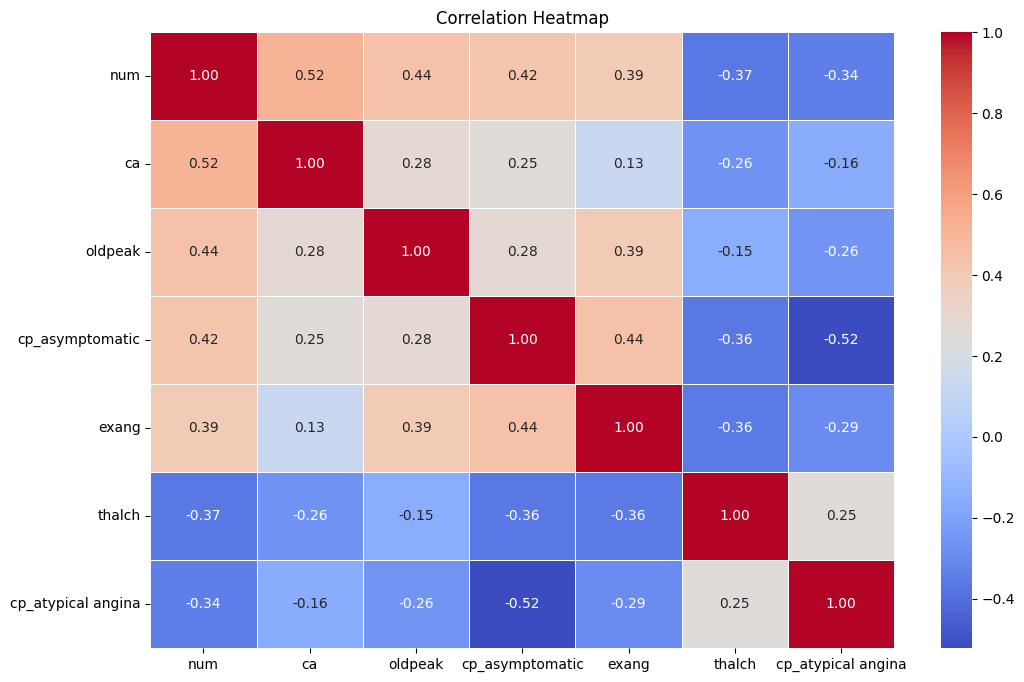

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data_updated = numerical_data.select_dtypes(include=['number'])

columns_to_keep = ['num', 'ca', 'oldpeak', 'cp_asymptomatic', 'exang', 'thalch', 'cp_atypical angina']

numerical_data_cleaned = numerical_data_updated[columns_to_keep]

numerical_data_cleaned = numerical_data_cleaned.dropna(axis=1, how='all')

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [201]:
#check if columns to keep have NA
numerical_data_cleaned.isna().sum()

,0
num,0
ca,611
oldpeak,62
cp_asymptomatic,0
exang,55
thalch,55
cp_atypical angina,0


In [202]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd



numerical_data_updated = numerical_data.select_dtypes(include=['number'])


numerical_data_cleaned = numerical_data.dropna(axis=1, how='all')



imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(numerical_data_cleaned)

features_imputed_df = pd.DataFrame(features_imputed, columns=numerical_data_cleaned.columns)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed_df)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print(pca_df.head())


        PC1       PC2
0  0.464395  3.333940
1  3.062878  2.423883
2  3.198359  1.480548
3 -2.069372  0.446193
4 -3.224924  2.311241


In [203]:
import pandas as pd

loadings = pd.DataFrame(pca.components_, columns=features_imputed_df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)]) # Changed X.columns to features_imputed_df.columns
print(loadings)


          age  trestbps      chol       fbs    thalch     exang   oldpeak  \
PC1  0.249998  0.124272 -0.102242  0.100639 -0.306649  0.327335  0.299293   
PC2  0.237506  0.145209  0.149854  0.183673  0.171784 -0.075688  0.089399   

           ca       num  cp_asymptomatic  ...  cp_typical angina  \
PC1  0.179746  0.373141         0.352108  ...          -0.041654   
PC2  0.061942  0.050908        -0.120824  ...           0.163227   

     restecg_lv hypertrophy  restecg_normal  restecg_st-t abnormality  \
PC1                0.036759       -0.127622                  0.121995   
PC2                0.534736       -0.524466                  0.103756   

     slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
PC1           0.125591    0.240170        -0.188039           0.065491   
PC2           0.056909   -0.079687         0.251917          -0.010346   

     thal_normal  thal_reversable defect  
PC1    -0.203633                0.185616  
PC2     0.300496                0.

In [204]:
import numpy as np
import pandas as pd

loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=features_imputed_df.columns)

top_7_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False).head(7)

top_7_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False).head(7)

# Imprimir los resultados
print("Top 7 PC1:")
print(top_7_pc1)

print("\nTop 7 PC2:")
print(top_7_pc2)

Top 7 PC1:
num                   0.373141
cp_asymptomatic       0.352108
exang                 0.327335
thalch                0.306649
oldpeak               0.299293
cp_atypical angina    0.260532
age                   0.249998
Name: PC1, dtype: float64

Top 7 PC2:
restecg_lv hypertrophy    0.534736
restecg_normal            0.524466
thal_normal               0.300496
slope_upsloping           0.251917
age                       0.237506
fbs                       0.183673
thalch                    0.171784
Name: PC2, dtype: float64


# **We can observe that PC1 and the analysis we performed before of correlation, give us a similar output of which features are the most important. The only difference are that age wasnt so strong correlated but appears in PC1, and ca was strongly correlated but doesnt appear in PC1. For our analysis we are going to use 'age', 'ca', 'oldpeak', 'cp_asymptomatic', 'exang', 'thalch', 'cp_atypical angina' in order to predict 'num'. Leaving aside some columns such us ['sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'slope', 'thal', 'num'] that dont represent a good asset to predict our target**


In [205]:
df['age'].isna().sum()

0

# **From the features that we are going to use to predict num, we are missing some values in columns 'ca', 'oldpeak', 'exang', 'thalch'. We are using KNN to fill those missing values**

In [206]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
numerical_data_cleaned[['ca', 'oldpeak', 'exang', 'thalch']] = imputer.fit_transform(numerical_data_cleaned[['ca', 'oldpeak', 'exang', 'thalch']])

In [207]:
df.columns

Index(['age', 'sex', 'dataset', 'trestbps', 'chol', 'fbs', 'thalch', 'exang',
       'oldpeak', 'ca', 'num', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_downsloping',
       'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [208]:
# droping columns that we are not using to predict num:
columns_to_drop = [
    'sex', 'dataset', 'trestbps', 'chol', 'fbs', 'cp_non-anginal',
    'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
    'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat',
    'slope_upsloping', 'thal_fixed defect', 'thal_normal',
    'thal_reversable defect'
]

df_cleaned = df.drop(columns=columns_to_drop)

print(df_cleaned.head())


   age  thalch  exang  oldpeak   ca  num  cp_asymptomatic  cp_atypical angina
0   63   150.0    0.0      2.3  0.0    0                0                   0
1   67   108.0    1.0      1.5  3.0    2                1                   0
2   67   129.0    1.0      2.6  2.0    1                1                   0
3   37   187.0    0.0      3.5  0.0    0                0                   0
4   41   172.0    0.0      1.4  0.0    0                0                   1


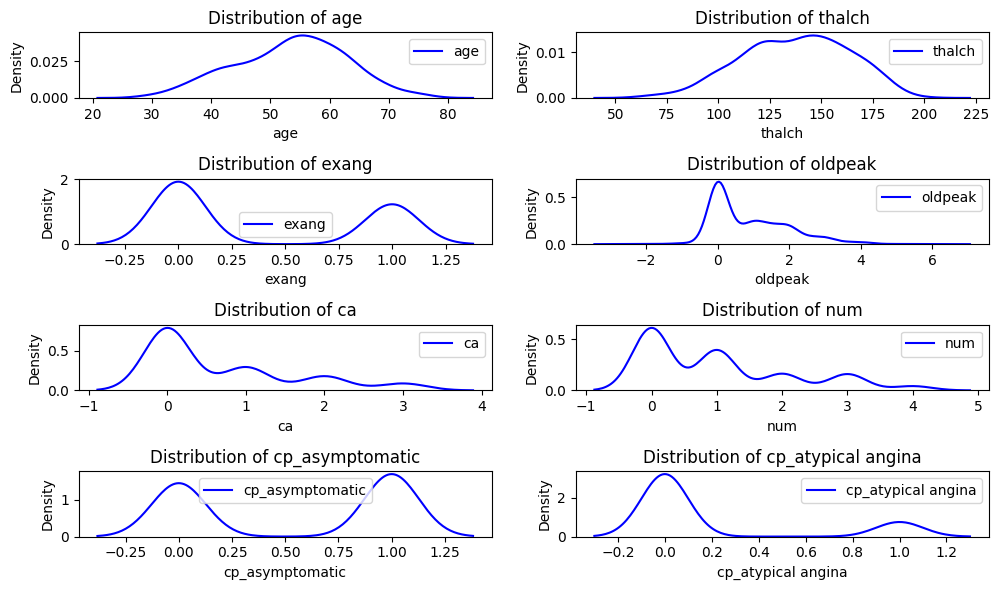

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['age', 'thalch', 'exang', 'oldpeak', 'ca', 'num',
                   'cp_asymptomatic', 'cp_atypical angina']

n_cols = 2
n_rows = (len(columns_to_plot) + 1) // n_cols

plt.figure(figsize=(10, 6))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(df_cleaned[col].dropna(), label=f'{col}', color='blue')
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()


# **Checking outliers in columns that we will use to predict num:**

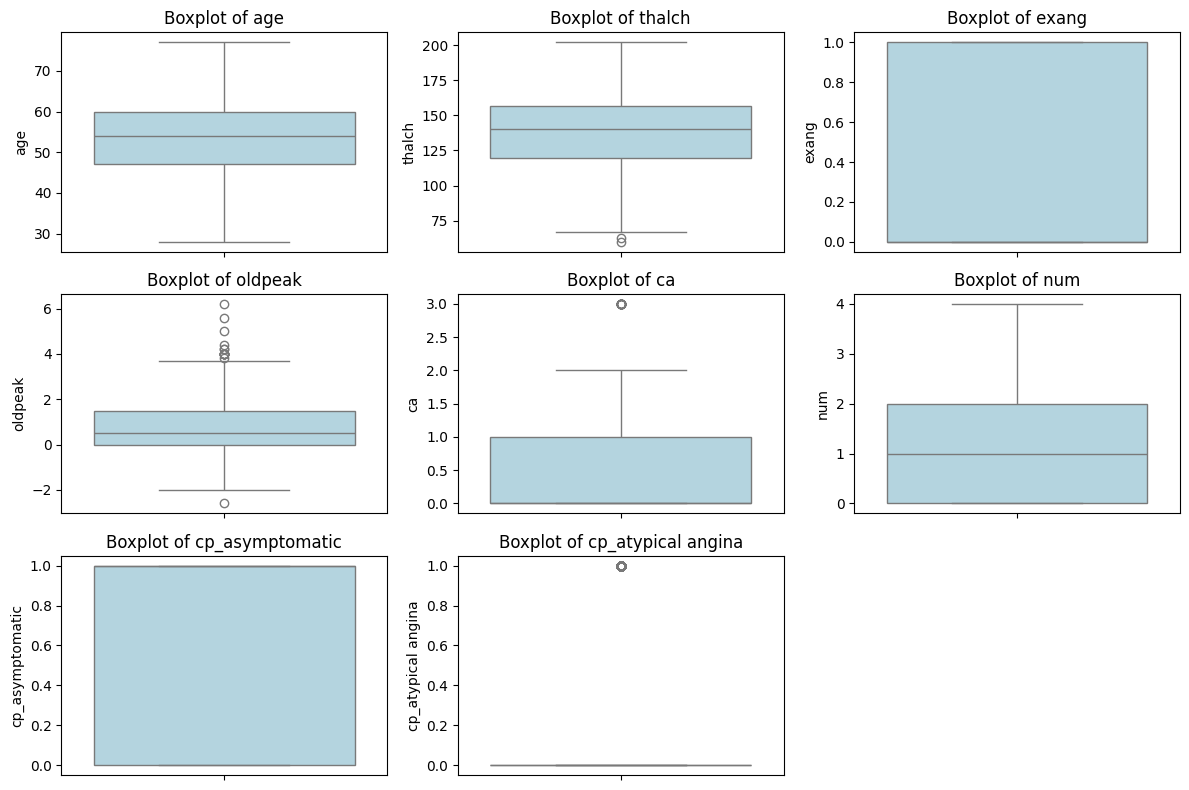

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['age', 'thalch', 'exang', 'oldpeak', 'ca', 'num',
                   'cp_asymptomatic', 'cp_atypical angina']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_cleaned[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [211]:
import pandas as pd

columns_to_check = ['age', 'thalch', 'exang', 'oldpeak', 'ca', 'num',
                    'cp_asymptomatic', 'cp_atypical angina']

outliers = {}

for col in columns_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]

print(outliers)


{'age': 0, 'thalch': 2, 'exang': 0, 'oldpeak': 16, 'ca': 20, 'num': 0, 'cp_asymptomatic': 0, 'cp_atypical angina': 174}


# **We will impute some of the outliers with KNN and some of them we will delete them. If we would delete all of them we would have very small data to work on**


In [212]:
import numpy as np
from sklearn.impute import KNNImputer

columns_with_outliers = ['cp_atypical angina', 'ca']

imputer = KNNImputer(n_neighbors=5)
df_cleaned[columns_with_outliers] = imputer.fit_transform(df_cleaned[columns_with_outliers])


columns_to_check = [col for col in df_cleaned.columns if col not in columns_with_outliers]

for col in columns_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(df_cleaned.shape)


(734, 8)


# **Spliting train and test data**

In [213]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('num', axis=1)
y = df_cleaned['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (587, 7)
X_test shape: (147, 7)
y_train shape: (587,)
y_test shape: (147,)


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7143
Confusion Matrix:
[[75 10  2]
 [14 26  2]
 [ 4 10  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        87
           1       0.57      0.62      0.59        42
           2       0.50      0.22      0.31        18

    accuracy                           0.71       147
   macro avg       0.62      0.57      0.58       147
weighted avg       0.70      0.71      0.70       147



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [215]:
print(y_test.value_counts())


num
0    87
1    42
2    18
Name: count, dtype: int64


# **We see that num 3 and 4 were not in the test values, so we are going to fix a few things:**

In [216]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [218]:
y_pred = logreg.predict(X_test)


In [219]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.5510204081632653


In [220]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[52 15 11]
 [13 18 18]
 [ 2  7 11]]


In [221]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        78
           1       0.45      0.37      0.40        49
           2       0.28      0.55      0.37        20

    accuracy                           0.55       147
   macro avg       0.50      0.53      0.50       147
weighted avg       0.60      0.55      0.57       147



# **In the case of heart disease diagnosis, it is more important to identify as many positive cases as possible (people who actually have heart disease), even if it means incorrectly diagnosing some people who do not have heart disease. This is because missing a true positive case (someone who actually has heart disease but is not diagnosed) could be dangerous, as it would mean they would not receive treatment or intervention. In this case, we would prefer to maximize recall.**

# **Because we chose recall, we are going to lower the threshold to improve recall**

In [222]:
threshold = 0.3
y_pred_prob = logreg.predict_proba(X_test)
y_pred_adjusted = (y_pred_prob[:, 1] > threshold).astype(int)


In [223]:
from sklearn.metrics import classification_report, recall_score

# Calculate recall for multiclass classification
print("Recall (macro):", recall_score(y_test, y_pred_adjusted, average='macro'))
print("Recall (weighted):", recall_score(y_test, y_pred_adjusted, average='weighted'))

# Print the full classification report
print("Classification Report with adjusted threshold:")
print(classification_report(y_test, y_pred_adjusted))


Recall (macro): 0.45857317285888716
Recall (weighted): 0.5850340136054422
Classification Report with adjusted threshold:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68        78
           1       0.46      0.73      0.56        49
           2       0.00      0.00      0.00        20

    accuracy                           0.59       147
   macro avg       0.40      0.46      0.42       147
weighted avg       0.54      0.59      0.55       147



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **The model, after adjusting the threshold to maximize recall, achieved an accuracy of 55.1%. While recall for class 1 (moderate heart disease) improved to 73%, the model struggled with detecting severe heart disease cases (class 2), with a recall of 0%. The results suggest that although the model's recall is higher, particularly for moderate cases, it still fails to adequately detect severe cases of heart disease. Given the medical context, improving recall is crucial, but further model improvements, such as handling class imbalance or exploring different machine learning algorithms, may be necessary to optimize the performance across all classes.**

# **Trying with other models:**

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)


Accuracy (Random Forest): 0.6395
Confusion Matrix (Random Forest):
[[60 16  2]
 [17 28  4]
 [ 4 10  6]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        78
           1       0.52      0.57      0.54        49
           2       0.50      0.30      0.38        20

    accuracy                           0.64       147
   macro avg       0.59      0.55      0.56       147
weighted avg       0.63      0.64      0.63       147



In [225]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced', probability=True, random_state=42)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print("Classification Report (SVM):")
print(class_report_svm)


Accuracy (SVM): 0.4286
Confusion Matrix (SVM):
[[41 14 23]
 [19  9 21]
 [ 5  2 13]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.63      0.53      0.57        78
           1       0.36      0.18      0.24        49
           2       0.23      0.65      0.34        20

    accuracy                           0.43       147
   macro avg       0.41      0.45      0.38       147
weighted avg       0.49      0.43      0.43       147



In [226]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, scale_pos_weight=1)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy (XGBoost): {accuracy_xgb:.4f}")
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)
print("Classification Report (XGBoost):")
print(class_report_xgb)


Accuracy (XGBoost): 0.5850
Confusion Matrix (XGBoost):
[[58 18  2]
 [19 23  7]
 [ 8  7  5]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        78
           1       0.48      0.47      0.47        49
           2       0.36      0.25      0.29        20

    accuracy                           0.59       147
   macro avg       0.51      0.49      0.49       147
weighted avg       0.57      0.59      0.58       147



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


# **In conclusion,  Forest was chosen because it provided the highest recall among the models tested, making it the best choice for minimizing false negatives in the classification task. The model’s robustness, ability to handle class imbalances, and potential for further improvement make it a strong candidate for this problem.**

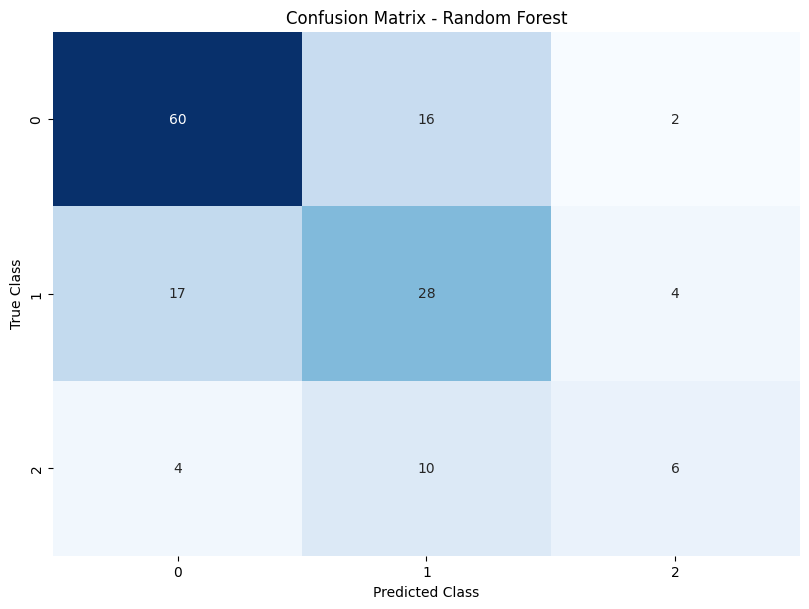

In [230]:
class_names = ['0', '1', '2']

matrix_rf = confusion_matrix(y_test, y_pred_rf)

df_rf = pd.DataFrame(matrix_rf, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(df_rf, annot=True, cbar=None, cmap="Blues", fmt='g')

plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


The model correctly predicted 60 instances of Class 0,

16: This is the number of instances where the model incorrectly predicted Class 0 as Class 1,

2: This is the number of instances where the model incorrectly predicted Class 0 as Class 2,

17: This is the number of instances where the model incorrectly predicted Class 1 as Class 0,

28: This is the number of true positive predictions for Class 1. The model correctly predicted 28 instances of Class 1.

4: This is the number of instances where the model incorrectly predicted Class 1 as Class 2,

4: This is the number of instances where the model incorrectly predicted Class 2 as Class 0,

10: This is the number of instances where the model incorrectly predicted Class 2 as Class 1,

6: This is the number of true positive predictions for Class 2. The model correctly predicted 6 instances of Class 2.